In [20]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

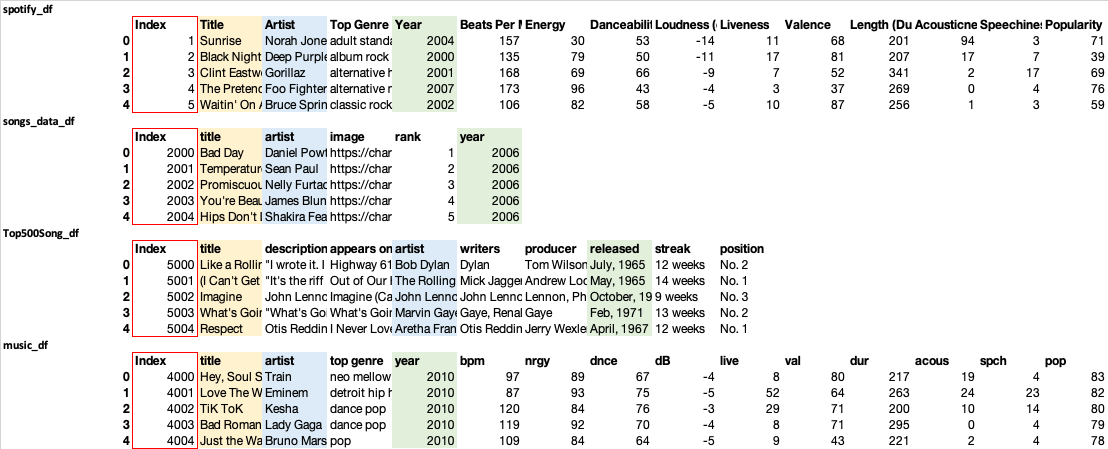

## Spotify Top Songs 2000s (John)

In [2]:
# Extract
csv_file = "resources/spotify_2000.csv"
spotify_df = pd.read_csv(csv_file)
spotify_df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
# Transform
spotify_transformed = spotify_df[["Index", "Title", "Artist", "Year"]].copy()

spotify_transformed = spotify_transformed.rename(columns={"Index":"song_id", "Title":"title", "Artist":"artist","Year":"year_released"})

spotify_transformed = spotify_transformed.set_index("song_id")

spotify_transformed

,title,artist,year_released
song_id,,,
1,Sunrise,Norah Jones,2004
2,Black Night,Deep Purple,2000
3,Clint Eastwood,Gorillaz,2001
4,The Pretender,Foo Fighters,2007
5,Waitin' On A Sunny Day,Bruce Springsteen,2002
...,...,...,...
1990,Heartbreak Hotel,Elvis Presley,1958
1991,Hound Dog,Elvis Presley,1958
1992,Johnny B. Goode,Chuck Berry,1959


## Billboard Top Songs 2006-2019 (Jacqueline)

In [4]:
# Extract
csv_file = "resources/billboard.csv"
songs_data_df = pd.read_csv(csv_file)
songs_data_df.head()

,Index,title,artist,image,rank,year
0,2000,Bad Day,Daniel Powter,https://charts-static.billboard.com/img/1840/1...,1,2006
1,2001,Temperature,Sean Paul,https://charts-static.billboard.com/img/2005/1...,2,2006
2,2002,Promiscuous,Nelly Furtado Featuring Timbaland,https://charts-static.billboard.com/img/2006/0...,3,2006
3,2003,You're Beautiful,James Blunt,https://charts-static.billboard.com/img/2005/0...,4,2006
4,2004,Hips Don't Lie,Shakira Featuring Wyclef Jean,https://charts-static.billboard.com/img/2006/0...,5,2006


In [5]:
# Transform
new_songs_df=songs_data_df.drop(['image','rank'],axis=1)

new_songs_df = new_songs_df.rename(columns={"Index": "song_id", "title": "title","artist":"artist","year":"year_released"})

new_songs_df = new_songs_df.set_index("song_id")

new_songs_df

,title,artist,year_released
song_id,,,
2000,Bad Day,Daniel Powter,2006
2001,Temperature,Sean Paul,2006
2002,Promiscuous,Nelly Furtado Featuring Timbaland,2006
2003,You're Beautiful,James Blunt,2006
2004,Hips Don't Lie,Shakira Featuring Wyclef Jean,2006
...,...,...,...
3393,Eyes On You,Chase Rice,2019
3394,All To Myself,Dan + Shay,2019
3395,Boyfriend,Ariana Grande & Social House,2019


## Rolling Stones Top Songs All-Time (Pat)

In [6]:
# Extract
csv_file = "resources/rollingstones.csv"
Top500Song_df = pd.read_csv(csv_file, encoding= 'unicode_escape')
Top500Song_df.head()

,Index,title,description,appears on,artist,writers,producer,released,streak,position
0,5000,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,"July, 1965",12 weeks,No. 2
1,5001,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,"May, 1965",14 weeks,No. 1
2,5002,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine (Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono","October, 1971",9 weeks,No. 3
3,5003,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On (Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye,"Feb, 1971",13 weeks,No. 2
4,5004,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You (Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,"April, 1967",12 weeks,No. 1


In [7]:
# Transform
# Separate the month and year into separate columns
new = Top500Song_df["released"].str.split(expand=True)
new = new[1]
Top500Song_df["released"] = new

# Create a filtered dataframe from specific columns
Top500Song_cols = ["Index", "title", "artist", "released"]
Top500Song_transformed = Top500Song_df[Top500Song_cols].copy()

# Rename the column headers
Top500Song_transformed = Top500Song_transformed.rename(columns={"title": "title",
                                                               "artist": "artist",
                                                               "released": "year_released",
                                                               "Index": "song_id"})

Top500Song_transformed = Top500Song_transformed.set_index("song_id")

Top500Song_transformed

,title,artist,year_released
song_id,,,
5000,Like a Rolling Stone,Bob Dylan,1965
5001,(I Can't Get No) Satisfaction',The Rolling Stones,1965
5002,Imagine,John Lennon,1971
5003,What's Going On,Marvin Gaye,1971
5004,Respect,Aretha Franklin,1967
...,...,...,...
5495,Heroin,The Velvet Underground,1967
5496,Leader of the Pack,The Shangri-Las,1964
5497,Pressure Drop,Toots and the Maytals,1973


## Spotify Top Songs 2010-2019 (Guy)

In [8]:
# Extract
csv_file = "resources/spotify_2010.csv"
music_df = pd.read_csv(csv_file, encoding= 'unicode_escape')
music_df.head()

,Index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,4000,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,4001,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,4002,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4003,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,4004,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [9]:
# Transform
music_transformed = music_df[["Index", "title", "artist", "year"]].copy()

music_transformed = music_transformed.rename(columns={"Index":"song_id", "year":"year_released"})

music_transformed = music_transformed.set_index("song_id")

music_transformed

,title,artist,year_released
song_id,,,
4000,"Hey, Soul Sister",Train,2010
4001,Love The Way You Lie,Eminem,2010
4002,TiK ToK,Kesha,2010
4003,Bad Romance,Lady Gaga,2010
4004,Just the Way You Are,Bruno Mars,2010
...,...,...,...
4598,Find U Again (feat. Camila Cabello),Mark Ronson,2019
4599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,2019
4600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,2019


## Load the Data into SQL Database (John)

In [10]:
# Create database connection
connection_string = "postgres:0827@localhost:5432/popular_songs_db"
engine = create_engine(f'postgresql://{connection_string}')

In [11]:
# Check table names
engine.table_names()

['combined_results',
 'spotify_2000',
 'spotify_2010',
 'billboard',
 'rollingstones']

In [12]:
# Load dataframes into database
spotify_transformed.to_sql(name='spotify_2000', con=engine, if_exists='append', index=True)
music_transformed.to_sql(name='spotify_2010', con=engine, if_exists='append', index=True)
new_songs_df.to_sql(name='billboard', con=engine, if_exists='append', index=True)
Top500Song_transformed.to_sql(name='rollingstones', con=engine, if_exists='append', index=True)

In [13]:
# Check to see if data loaded in
pd.read_sql_query('select * from rollingstones', con=engine).head()

,song_id,title,artist,year_released
0,5000,Like a Rolling Stone,Bob Dylan,1965
1,5001,(I Can't Get No) Satisfaction',The Rolling Stones,1965
2,5002,Imagine,John Lennon,1971
3,5003,What's Going On,Marvin Gaye,1971
4,5004,Respect,Aretha Franklin,1967


## Load Combined Data into New Dataframe (Sam)

In [15]:
hits_data_all = pd.read_sql_query('select * from combined_results', con=engine)
hits_data_all

,song_id,title,artist,year_released
0,1,Sunrise,Norah Jones,2004
1,2,Black Night,Deep Purple,2000
2,3,Clint Eastwood,Gorillaz,2001
3,4,The Pretender,Foo Fighters,2007
4,5,Waitin' On A Sunny Day,Bruce Springsteen,2002
...,...,...,...,...
4490,5495,Heroin,The Velvet Underground,1967
4491,5496,Leader of the Pack,The Shangri-Las,1964
4492,5497,Pressure Drop,Toots and the Maytals,1973
4493,5498,Come As You Are,Nirvana,1991


In [16]:
hits_data_all['title_artist_released'] = hits_data_all['title'].map(str) + ', ' + hits_data_all['artist'].map(str) + \
            ', ' + hits_data_all['year_released'].map(str)
hits_data_all

,song_id,title,artist,year_released,title_artist_released
0,1,Sunrise,Norah Jones,2004,"Sunrise, Norah Jones, 2004"
1,2,Black Night,Deep Purple,2000,"Black Night, Deep Purple, 2000"
2,3,Clint Eastwood,Gorillaz,2001,"Clint Eastwood, Gorillaz, 2001"
3,4,The Pretender,Foo Fighters,2007,"The Pretender, Foo Fighters, 2007"
4,5,Waitin' On A Sunny Day,Bruce Springsteen,2002,"Waitin' On A Sunny Day, Bruce Springsteen, 2002"
...,...,...,...,...,...
4490,5495,Heroin,The Velvet Underground,1967,"Heroin, The Velvet Underground, 1967"
4491,5496,Leader of the Pack,The Shangri-Las,1964,"Leader of the Pack, The Shangri-Las, 1964"
4492,5497,Pressure Drop,Toots and the Maytals,1973,"Pressure Drop, Toots and the Maytals, 1973"
4493,5498,Come As You Are,Nirvana,1991,"Come As You Are, Nirvana, 1991"


In [17]:
columns_to_keep = [
    'title',
    'artist',
    'year_released',
    'title_artist_released'

    ]
hits_data = hits_data_all[columns_to_keep]
hits_data

,title,artist,year_released,title_artist_released
0,Sunrise,Norah Jones,2004,"Sunrise, Norah Jones, 2004"
1,Black Night,Deep Purple,2000,"Black Night, Deep Purple, 2000"
2,Clint Eastwood,Gorillaz,2001,"Clint Eastwood, Gorillaz, 2001"
3,The Pretender,Foo Fighters,2007,"The Pretender, Foo Fighters, 2007"
4,Waitin' On A Sunny Day,Bruce Springsteen,2002,"Waitin' On A Sunny Day, Bruce Springsteen, 2002"
...,...,...,...,...
4490,Heroin,The Velvet Underground,1967,"Heroin, The Velvet Underground, 1967"
4491,Leader of the Pack,The Shangri-Las,1964,"Leader of the Pack, The Shangri-Las, 1964"
4492,Pressure Drop,Toots and the Maytals,1973,"Pressure Drop, Toots and the Maytals, 1973"
4493,Come As You Are,Nirvana,1991,"Come As You Are, Nirvana, 1991"


In [18]:
hits_data = hits_data.drop_duplicates(subset='title_artist_released', keep="first")
hits_data

,title,artist,year_released,title_artist_released
0,Sunrise,Norah Jones,2004,"Sunrise, Norah Jones, 2004"
1,Black Night,Deep Purple,2000,"Black Night, Deep Purple, 2000"
2,Clint Eastwood,Gorillaz,2001,"Clint Eastwood, Gorillaz, 2001"
3,The Pretender,Foo Fighters,2007,"The Pretender, Foo Fighters, 2007"
4,Waitin' On A Sunny Day,Bruce Springsteen,2002,"Waitin' On A Sunny Day, Bruce Springsteen, 2002"
...,...,...,...,...
4488,The Twist,Chubby Checker,1960,"The Twist, Chubby Checker, 1960"
4490,Heroin,The Velvet Underground,1967,"Heroin, The Velvet Underground, 1967"
4491,Leader of the Pack,The Shangri-Las,1964,"Leader of the Pack, The Shangri-Las, 1964"
4492,Pressure Drop,Toots and the Maytals,1973,"Pressure Drop, Toots and the Maytals, 1973"


In [22]:
charts_year = hits_data.groupby(['year_released'])

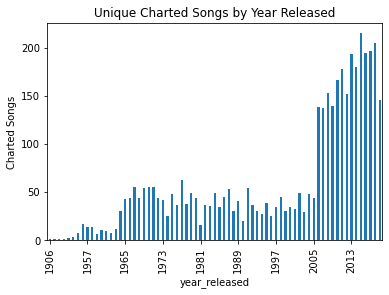

In [31]:
charts_year["title_artist_released"].nunique().plot.bar()
plt.ylabel("Charted Songs")
plt.title("Unique Charted Songs by Year Released")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

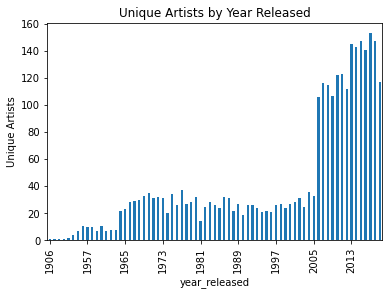

In [32]:
charts_year["artist"].nunique().plot.bar()
plt.ylabel("Unique Artists")
plt.title("Unique Artists by Year Released")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

## Data Constraints and Observations

* This dataset's records trend towards later years
* Analyses over long time periods will likely be skewed by the number of charted hits per year
* analyses will have a greater n for years 2005 and later, and so will likely be less skewed by outliers

In [25]:
df_2006_and_later = hits_data.loc[hits_data['year_released'] > 2005] 
df_2006_and_later

,title,artist,year_released,title_artist_released
3,The Pretender,Foo Fighters,2007,"The Pretender, Foo Fighters, 2007"
7,Knights of Cydonia,Muse,2006,"Knights of Cydonia, Muse, 2006"
14,Fluorescent Adolescent,Arctic Monkeys,2007,"Fluorescent Adolescent, Arctic Monkeys, 2007"
15,Zonder Jou,Paul de Leeuw,2006,"Zonder Jou, Paul de Leeuw, 2006"
21,The Cave,Mumford & Sons,2009,"The Cave, Mumford & Sons, 2009"
...,...,...,...,...
3992,Boyfriend,Ariana Grande & Social House,2019,"Boyfriend, Ariana Grande & Social House, 2019"
3993,Walk Me Home,P!nk,2019,"Walk Me Home, P!nk, 2019"
3994,Robbery,Juice WRLD,2019,"Robbery, Juice WRLD, 2019"
4209,Paper Planes,M.I.A.,2007,"Paper Planes, M.I.A., 2007"


In [26]:
charts_year_post_2006 = df_2006_and_later.groupby(['year_released'])


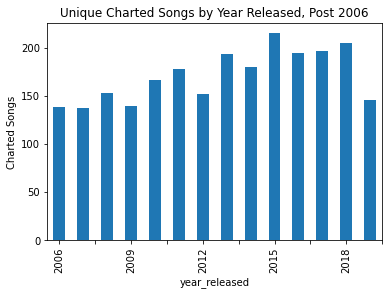

In [27]:
charts_year_post_2006["title_artist_released"].nunique().plot.bar()
plt.ylabel("Charted Songs")
plt.title("Unique Charted Songs by Year Released, Post 2006")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

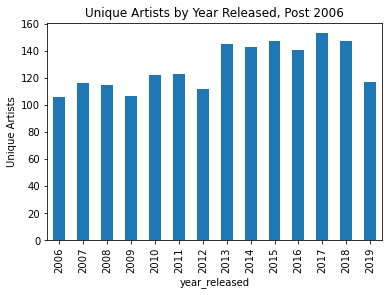

In [28]:
charts_year_post_2006["artist"].nunique().plot.bar()
plt.ylabel("Unique Artists")
plt.title("Unique Artists by Year Released, Post 2006")
plt.show()